In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv("Mall_Customers.csv")
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
print(X.head())


   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


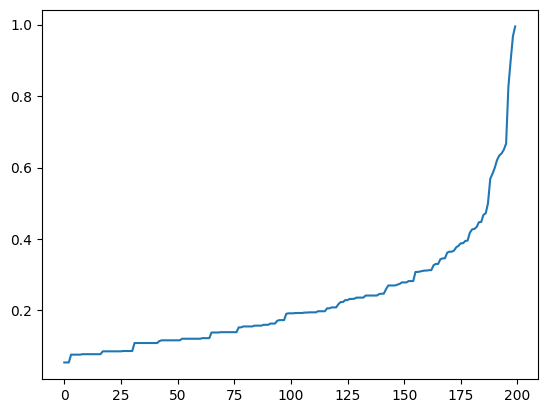

In [27]:
from sklearn.neighbors import NearestNeighbors

# implement k nearest neighbours
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 3]
plt.plot(distances)

In [23]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

data['Cluster'] = clusters


In [24]:
print(np.unique(clusters))


[-1  0  1  2  3]


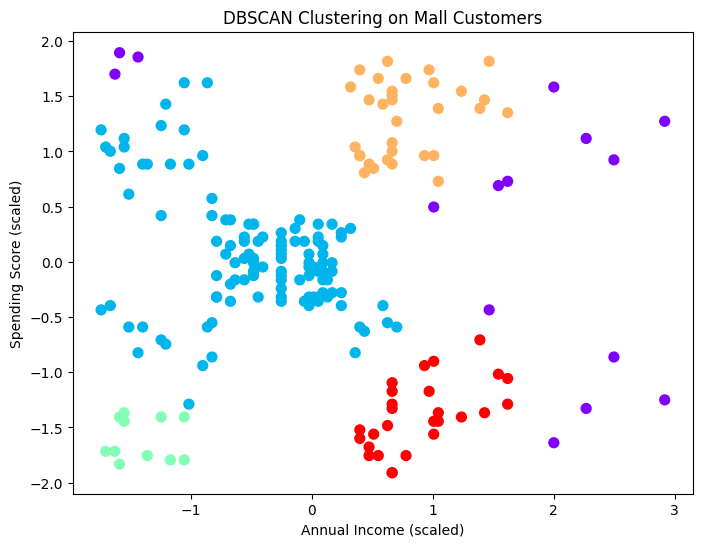

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0],X_scaled[:, 1],c=clusters,cmap='rainbow',s=50)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('DBSCAN Clustering on Mall Customers')
plt.show()
